<a href="https://colab.research.google.com/github/Chirag1997aggarwal/ineuronAssignments/blob/main/matplotlib_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matplotlib assignment
 - from ineuron.ai
 - https://drive.google.com/file/d/1dYMB7plxsKS5U8yfvec5VWdgLuTc05nR/view
 - scipy > optimize > curve_fit
    - https://www.geeksforgeeks.org/scipy-curve-fitting/
    - https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_curvefit_temperature_data.html

 - Matplotlib : 
    - Pie chart
    - scatter plot

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import pandas as pd

## We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the datasetvgiven below.
Task:
1.   fitting it to the periodic function
2.   plot the fit

Data -<br/>
<b>Max = </b>39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br/>
<b>Min = </b>21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
x_month = list(range(1, 13))

In [3]:
mx = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
mn = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

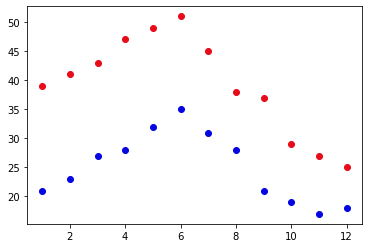

In [4]:
plt.scatter(x_month, mx, color='#e80b19')
plt.scatter(x_month, mn, color='#0405e0')
plt.show()

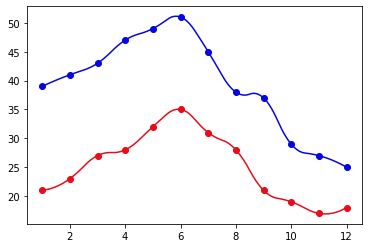

In [7]:
x = np.array(x_month)
y1 = np.array(mn)
y2 = np.array(mx)
x_smooth = np.linspace(x.min(), x.max(), 300)
f1 = interp1d(x, y1, kind='quadratic')
f2 = interp1d(x, y2, kind='quadratic')
plt.scatter(x_month, mn, color='#e80b19')
plt.scatter(x_month, mx, color='#0405e0')
plt.plot(x_smooth, f1(x_smooth), color='#e80b19')
plt.plot(x_smooth, f2(x_smooth), color='#0405e0')
plt.show()

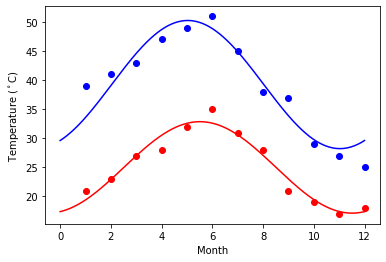

In [21]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, x,
                                      y1, [20, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, x,
                                      y2, [-40, -20, 0])
  

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(x, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(x, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

--2021-07-03 02:56:15--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106975 (104K) [text/plain]
Saving to: ‘titanic_original.csv’

titanic_original.cs 100%[===================>] 104.47K  --.-KB/s    in 0.04s   

2021-07-03 02:56:16 (2.86 MB/s) - ‘titanic_original.csv’ saved [106975/106975]



In [ ]:
data = pd.read_csv('titanic_original.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'The male/female proportion')

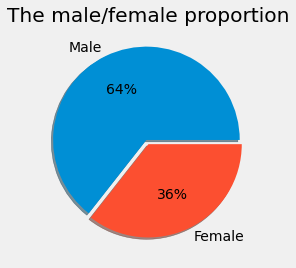

In [ ]:
plt.style.use('fivethirtyeight')
plt.pie(
    data['sex'].value_counts(), 
    labels=['Male', 'Female'], 
    explode=[0.05, 0],
    shadow=True,
    autopct='%1.0f%%')
plt.title('The male/female proportion')

In [ ]:
data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [ ]:
male_data = data[data['sex']=='male']
female_data = data[data['sex']=='female']

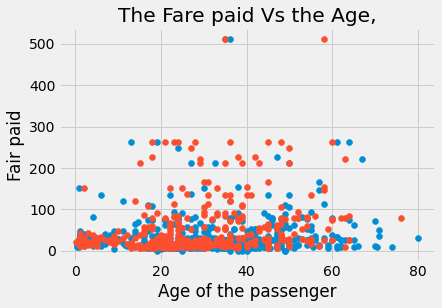

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(male_data['age'], male_data['fare'])
plt.scatter(female_data['age'], female_data['fare'])
plt.xlabel('Age of the passenger')
plt.ylabel('Fair paid')
plt.title('The Fare paid Vs the Age,')
plt.show()